In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

In [2]:
%%R

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
df = pd.read_csv('Housing_Maintenance_Code_Violations (11).csv', usecols=['Borough', 'Postcode','ViolationStatus'])
df

,Borough,Postcode,ViolationStatus
0,BROOKLYN,11209.0,Open
1,QUEENS,11355.0,Close
2,BRONX,10453.0,Close
3,BRONX,10472.0,Close
4,MANHATTAN,10011.0,Open
...,...,...,...
1764564,QUEENS,11104.0,Open
1764565,QUEENS,11104.0,Open
1764566,QUEENS,11104.0,Open
1764567,QUEENS,11104.0,Open


In [4]:
df.groupby('Postcode').ViolationStatus.value_counts()

Postcode  ViolationStatus
1138.0    Close               1
1257.0    Open                7
1901.0    Open               10
          Close               3
1987.0    Open                1
                             ..
11692     Open               49
11693     Open               33
          Close               7
11694     Close              14
          Open               12
Name: ViolationStatus, Length: 729, dtype: int64

In [5]:
df.Postcode = df.Postcode.replace(" ", "").dropna()
df

,Borough,Postcode,ViolationStatus
0,BROOKLYN,11209.0,Open
1,QUEENS,11355.0,Close
2,BRONX,10453.0,Close
3,BRONX,10472.0,Close
4,MANHATTAN,10011.0,Open
...,...,...,...
1764564,QUEENS,11104.0,Open
1764565,QUEENS,11104.0,Open
1764566,QUEENS,11104.0,Open
1764567,QUEENS,11104.0,Open


In [7]:
df.Postcode = df.Postcode.fillna(0)
df

,Borough,Postcode,ViolationStatus
0,BROOKLYN,11209.0,Open
1,QUEENS,11355.0,Close
2,BRONX,10453.0,Close
3,BRONX,10472.0,Close
4,MANHATTAN,10011.0,Open
...,...,...,...
1764564,QUEENS,11104.0,Open
1764565,QUEENS,11104.0,Open
1764566,QUEENS,11104.0,Open
1764567,QUEENS,11104.0,Open


In [8]:
df.Postcode = df.Postcode.replace(" ", "")

In [12]:
#df[df.Postcode.str.contains("103 04")]

df.dtypes

Borough            object
Postcode           object
ViolationStatus    object
dtype: object

In [15]:
df['Postcode'] = df['Postcode'].apply(lambda x: (str(x).replace(' ', '')))
df['Postcode']

0          11209.0
1          11355.0
2          10453.0
3          10472.0
4          10011.0
            ...   
1764564    11104.0
1764565    11104.0
1764566    11104.0
1764567    11104.0
1764568    11355.0
Name: Postcode, Length: 1764569, dtype: object

In [13]:
df_long = df.melt(id_vars=['Postcode', 'Borough'], var_name='test_type', value_name='open_close').dropna()
df_long

,Postcode,Borough,test_type,open_close
0,11209.0,BROOKLYN,ViolationStatus,Open
1,11355.0,QUEENS,ViolationStatus,Close
2,10453.0,BRONX,ViolationStatus,Close
3,10472.0,BRONX,ViolationStatus,Close
4,10011.0,MANHATTAN,ViolationStatus,Open
...,...,...,...,...
1764564,11104.0,QUEENS,ViolationStatus,Open
1764565,11104.0,QUEENS,ViolationStatus,Open
1764566,11104.0,QUEENS,ViolationStatus,Open
1764567,11104.0,QUEENS,ViolationStatus,Open


In [74]:
df_long = df_long.drop(columns='test_type')
df_long

,Postcode,Borough,open_close
0,11209.0,BROOKLYN,Open
1,11355.0,QUEENS,Close
2,10453.0,BRONX,Close
3,10472.0,BRONX,Close
4,10011.0,MANHATTAN,Open
...,...,...,...
1764564,11104.0,QUEENS,Open
1764565,11104.0,QUEENS,Open
1764566,11104.0,QUEENS,Open
1764567,11104.0,QUEENS,Open


In [123]:
df_long['Postcode'].replace(" ", "")

0          11209.0
1          11355.0
2          10453.0
3          10472.0
4          10011.0
            ...   
1764564    11104.0
1764565    11104.0
1764566    11104.0
1764567    11104.0
1764568    11355.0
Name: Postcode, Length: 1761612, dtype: object

In [157]:
#df_long.Postcode.astype(int)

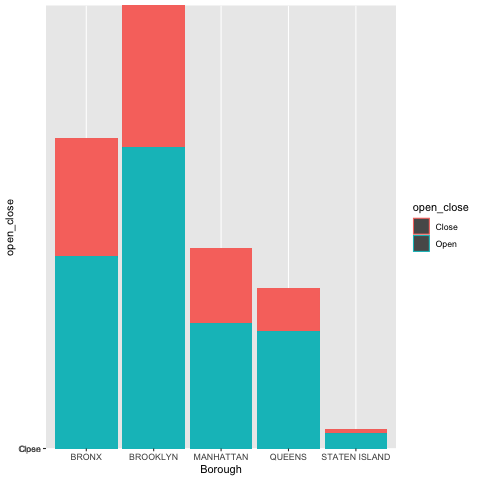

In [125]:
%%R -i df_long

ggplot(df_long) + aes(y=open_close, x=Borough, color=open_close) +
    geom_col(stat="count")

In [137]:
df_long.groupby("Borough").open_close.value_counts().to_csv('open_close_borough-wise.csv')

In [118]:
population = pd.read_csv("housing_df_long.csv")
population = population.drop(columns=['variable', 'value'])

In [141]:
population.groupby('borough').population.sum().to_csv('population_sum.csv')

In [142]:
df_open_close = pd.read_csv('open_close_borough-wise.csv')
df_open_close

,Borough,open_close,open_close.1
0,BRONX,Close,273694
1,BRONX,Open,223403
2,BROOKLYN,Open,350051
3,BROOKLYN,Close,331973
4,MANHATTAN,Close,175346
5,MANHATTAN,Open,144838
6,QUEENS,Open,135587
7,QUEENS,Close,100890
8,STATEN ISLAND,Open,16515
9,STATEN ISLAND,Close,9315


In [143]:
df_pop = pd.read_csv('population_sum.csv')
df_pop

,borough,population
0,BRONX,23517712
1,BROOKLYN,42803712
2,MANHATTAN,29652704
3,QUEENS,37898848
4,STATEN ISLAND,7673392


In [151]:
new_df = df_open_close.merge(df_pop, left_on="Borough", right_on="borough")
new_df = new_df.drop(columns='borough')
new_df

,Borough,open_close,open_close.1,population
0,BRONX,Close,273694,23517712
1,BRONX,Open,223403,23517712
2,BROOKLYN,Open,350051,42803712
3,BROOKLYN,Close,331973,42803712
4,MANHATTAN,Close,175346,29652704
5,MANHATTAN,Open,144838,29652704
6,QUEENS,Open,135587,37898848
7,QUEENS,Close,100890,37898848
8,STATEN ISLAND,Open,16515,7673392
9,STATEN ISLAND,Close,9315,7673392


In [155]:
new_df['per_100_thousand'] = (new_df['open_close.1'] / new_df['population']) * 100000

In [156]:
new_df

,Borough,open_close,open_close.1,population,per_100_thousand
0,BRONX,Close,273694,23517712,1163.778177
1,BRONX,Open,223403,23517712,949.935096
2,BROOKLYN,Open,350051,42803712,817.805241
3,BROOKLYN,Close,331973,42803712,775.570586
4,MANHATTAN,Close,175346,29652704,591.332244
5,MANHATTAN,Open,144838,29652704,488.447866
6,QUEENS,Open,135587,37898848,357.760215
7,QUEENS,Close,100890,37898848,266.208619
8,STATEN ISLAND,Open,16515,7673392,215.224245
9,STATEN ISLAND,Close,9315,7673392,121.393512


The following model is what I would like to build. However, I'm not able to solve some problems in the data.

In [ ]:
%%R -i df_long

model <- lm(open_close ~ Borough, data = df_long)

In [158]:
%%R  -i new_df
open <- new_df%>%filter(open_close == "Open")
close <- new_df%>%filter(open_close == "Close")
# T test individual artist's chance of winning 
t.test(open$per_100_thousand, close$per_100_thousand)


	Welch Two Sample t-test

data:  open$per_100_thousand and close$per_100_thousand
t = -0.077011, df = 7.4012, p-value = 0.9407
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -559.0917  523.4476
sample estimates:
mean of x mean of y 
 565.8345  583.6566 



In [159]:
%%R  -i new_df
open <- new_df%>%filter(open_close == "Open")
close <- new_df%>%filter(open_close == "Close")
# T test individual artist's chance of winning 
t.test(open$open_close.1, close$open_close.1)


	Welch Two Sample t-test

data:  open$open_close.1 and close$open_close.1
t = -0.052094, df = 7.978, p-value = 0.9597
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -188614.2  180284.6
sample estimates:
mean of x mean of y 
 174078.8  178243.6 



## Pitch

The story will help decide which borough has a problem of unresolved housing maintenance violation. Further reporting and statistical tests (for poverty, race, education, and employment) will help in determining the reason behind the number of unresolved violation. Against my previous beliefs, the raw numbers show that Brooklyn has the highest number of housing code violations. However, when adjusted by rate per 100,000 of population, Bronx tops the list for not just unresolved violations but also resolved violations. I decided to not plot it over time because the data is from January 1, 2020 to March 14, 2023. Therefore, all the complaints are those that were approved as official violations after January 1, 2020.

The statistical tests are not sound because the p-values show that there is not much difference between the rate of open cases and rate of closed cases. However, from reporting experience, I know that to be not-true.

I would like to ask a statistician what test I should run to better analyse this data.

I have a much more messy notebook that I'm not submitting. Hopefully this one contains parts of code that partially works and explains the steps I tried to follow.